In [79]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("df_new_L100.csv")

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
391263,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
391264,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
391265,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
391266,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


In [4]:
df.to_excel("df_new_L100.xlsx")

In [98]:
df_sample = df[(df['UnitPrice']<=20) & (df['UnitPrice']>=1) & (df['TotalPrice']<=200)]
df_sample = df_sample[:4999]
df_sample.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID,TotalPrice
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,536762.790958,6.646529,3.485573,15826.084617,17.222340
std,238.522504,10.176183,2.787779,1779.343301,22.646042
min,536365.000000,1.000000,1.050000,12395.000000,1.250000
25%,536557.000000,1.000000,1.650000,14449.000000,3.900000
50%,536761.000000,3.000000,2.550000,15862.000000,12.500000
75%,536987.000000,8.000000,4.250000,17757.000000,19.800000
max,537141.000000,96.000000,19.950000,18239.000000,198.000000


In [99]:
unique_product = df_sample.Description.value_counts().to_frame()
unique_product = unique_product.reset_index()
unique_product.columns =['product','value']
unique_product

,product,value
0,WHITE HANGING HEART T-LIGHT HOLDER,46
1,HAND WARMER UNION JACK,44
2,HAND WARMER SCOTTY DOG DESIGN,38
3,HAND WARMER OWL DESIGN,36
4,PAPER CHAIN KIT VINTAGE CHRISTMAS,33
...,...,...
1211,NUMBER TILE COTTAGE GARDEN 8,1
1212,GARDEN PATH SKETCHBOOK,1
1213,PING MICROWAVE APRON,1
1214,PIN CUSHION BABUSHKA PINK,1


In [13]:
# Import Lib for Text Cleaning

import re
from nltk.stem import PorterStemmer, SnowballStemmer
stemmer = SnowballStemmer('english')

In [17]:
# Clean Text function

def clean_text(text, stemming=False):
    text_clean = re.sub('\[', '', text)
    text_clean = re.sub('\]', '', text_clean)
    text_clean = re.sub('\/', ' ', text_clean)
    if stemming:
        text_clean = ' '.join([stemmer.stem(t) for t in text_clean.split()])
    else:
        text_clean = ' '.join(text_clean.split())
    return text_clean.lower()

In [100]:
product = unique_product['product']
product.fillna('', inplace=True)
product_clean = product.map(lambda x: clean_text(x, stemming=True))

In [101]:
product_clean

0       white hang heart t-light holder
1                hand warmer union jack
2         hand warmer scotti dog design
3                hand warmer owl design
4       paper chain kit vintag christma
                     ...               
1211        number tile cottag garden 8
1212             garden path sketchbook
1213                ping microwav apron
1214          pin cushion babushka pink
1215            blue polkadot coffe mug
Name: product, Length: 1216, dtype: object

In [102]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(lowercase=True, stop_words='english', ngram_range=(1,5))

In [103]:
vectorizer.fit(product_clean)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 5), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [104]:
vector = vectorizer.transform(product_clean)

In [105]:
words = vectorizer.get_feature_names()
count = vector.toarray().sum(axis=0)

In [106]:
print(vectorizer.get_feature_names())
print(vector.toarray().sum(axis=0))

['10', '10 balloon', '10 blue', '10 blue polkadot', '10 blue polkadot parti', '10 blue polkadot parti candl', '10 ivori', '10 ivori polkadot', '10 ivori polkadot parti', '10 ivori polkadot parti candl', '10 light', '10 light night', '10 light night owl', '10 pink', '10 pink polkadot', '10 pink polkadot parti', '10 pink polkadot parti candl', '10 red', '10 red polkadot', '10 red polkadot parti', '10 red polkadot parti candl', '10 reindeer', '10 santa', '10 vintag', '10 vintag baubl', '11', '11 pc', '12', '12 blue', '12 blue folkart', '12 blue folkart card', '12 daisi', '12 daisi peg', '12 daisi peg wood', '12 daisi peg wood box', '12 ivori', '12 ivori rose', '12 ivori rose peg', '12 ivori rose peg place', '12 lavend', '12 lavend botan', '12 lavend botan light', '12 messag', '12 messag card', '12 messag card envelop', '12 pink', '12 pink rose', '12 pink rose peg', '12 pink rose peg place', '12 red', '12 red rose', '12 red rose peg', '12 red rose peg place', '15', '15 silver', '15 silver 

In [107]:
df_words = pd.DataFrame(dict(zip(words,count)).items(),columns=['words','count']).sort_values('count',ascending=False)
df_words['ngram'] = df_words['words'].str.split().str.len()
df_words

,words,count,ngram
5591,set,134,1
5039,red,93,1
924,box,91,1
4651,pink,84,1
687,blue,77,1
...,...,...,...
2699,garden 8m,1,2
2697,gaoler key decor garden,1,4
2696,gaoler key decor,1,3
2695,gaoler key,1,2


In [119]:
df_words[(df_words['ngram']==1) &(df_words['count']>1)].head(20)

,words,count,ngram
5591,set,134,1
5039,red,93,1
924,box,91,1
4651,pink,84,1
687,blue,77,1
3158,heart,74,1
329,bag,67,1
5257,retrospot,61,1
1974,design,55,1
6814,vintag,54,1


In [125]:
df_top_words = df_words[(df_words['ngram']==1) &(df_words['count']>1)].head(50).words
list_top_words_or = '|'.join(df_top_words)
list_top_words_or

'set|red|box|pink|blue|heart|bag|retrospot|design|vintag|light|metal|white|mug|glass|candl|cake|holder|sign|polkadot|christma|black|rose|cream|tin|small|larg|hang|green|garden|water|flower|bowl|tea|paper|ribbon|hot|bottl|wooden|silver|pack|union|paisley|cover|love|ceram|skull|children|wood|doormat'

In [128]:
df_sample[df_sample['Description'].str.lower().str.contains(list_top_words_or)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
6153,537141,22910,PAPER CHAIN KIT VINTAGE CHRISTMAS,1,12/5/2010 12:57,2.95,15570.0,United Kingdom,2.95
6154,537141,22086,PAPER CHAIN KIT 50'S CHRISTMAS,10,12/5/2010 12:57,2.95,15570.0,United Kingdom,29.50
6155,537141,22910,PAPER CHAIN KIT VINTAGE CHRISTMAS,4,12/5/2010 12:57,2.95,15570.0,United Kingdom,11.80
6156,537141,21808,"CHRISTMAS GARLAND STARS,TREES",12,12/5/2010 12:57,3.75,15570.0,United Kingdom,45.00


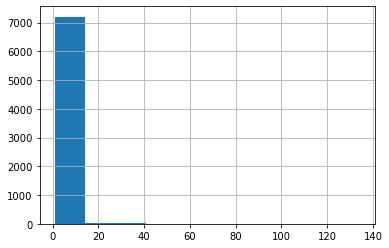

In [109]:
df_words['count'].hist(bins=10)

In [110]:
df_words[(df_words['ngram']>1) & (df_words['count']>1)] 

,words,count,ngram
5123,red retrospot,32,2
4043,metal sign,23,2
3752,light holder,20,2
3352,hot water bottl,19,3
3351,hot water,19,2
...,...,...,...
566,bird light holder,2,3
3562,keepsak box,2,2
4361,pack box,2,2
717,blue dinner,2,2


In [111]:
# Import TFIDF

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_model = TfidfVectorizer(lowercase=True, stop_words='english', ngram_range=(1,1))

In [112]:
product_tfidf = tfidf_model.fit_transform(product_clean)
product_tfidf

<1216x977 sparse matrix of type '<class 'numpy.float64'>'
	with 4944 stored elements in Compressed Sparse Row format>

In [76]:
# Import KMeans

from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=7)

In [115]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,100):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(product_tfidf)
    SSE.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

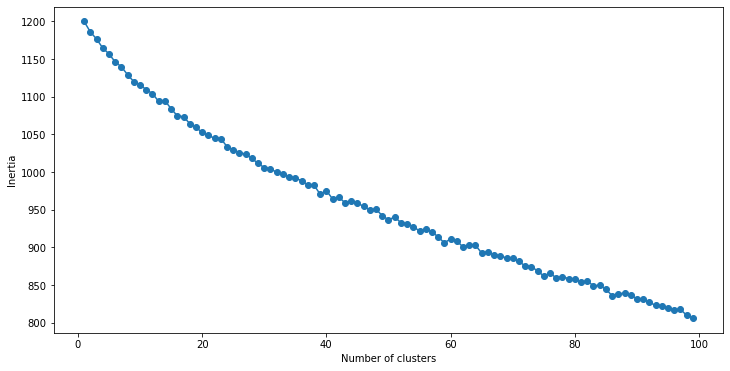

In [116]:
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,100), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')